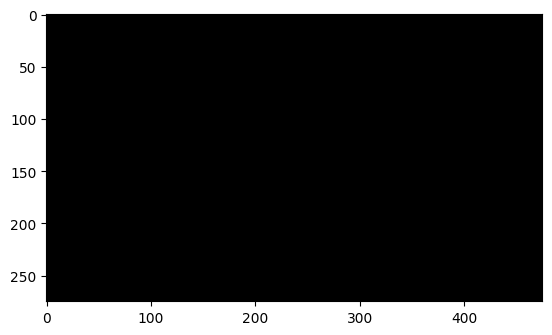

In [3]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from collections import deque
from queue import PriorityQueue
from utilsMinihackSearch import *
from typing import Tuple, List


# Function to perform hill climbing algorithm to find a path from start to target
def hill_climb(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[Tuple[int, int]]:
    # Initialize the current state with the start position
    current = {'state': start}
    # Initialize the parent dictionary to track paths
    parent = {start: None}  
    
    # Continue the loop until a solution is found or an appropriate condition is met
    while True:
        # Find the highest valued successor based on the heuristic
        neighbor = highest_valued_successors(current, game_map, target, h)
        
        # Check if the heuristic value of the neighbor is less than or equal to the current state
        if h(neighbor['state'], target) >= h(current['state'], target):
            # If true, construct and return the path
            path = build_path_HillClimb(parent, start, target)
            return path
        
        # Update the parent dictionary with the current and neighbor states
        parent[neighbor['state']] = current['state']
        # Move to the neighbor state for the next iteration
        current = neighbor
        
        # Debugging statements
        print("Parent dictionary:", parent)  
        print("Target:", target)
        print("Current state:", current['state'])  


# Function to build the path from the parent dictionary
def build_path_HillClimb(parent: dict, start: Tuple[int, int], target: Tuple[int, int]) -> List[Tuple[int, int]]:
    path = []
    current = target
    
    # Continue until reaching the start or a dead end
    while current is not None and current != start:
        # Append the current state to the path
        path.append(current)
        # Check if the current state is not in the parent dictionary
        if current not in parent:
            print(f"Target {target} not reachable from start {start}.")
            return None
        # Move to the parent state for backtracking
        current = parent[current]
    
    # Add the starting point to the path and reverse the order
    path.append(start)
    path.reverse()
    
    return path


# Function to find the highest valued successor based on the heuristic
def highest_valued_successors(node, game_map, target, h):
    # Get valid moves (successors) from the current state
    successors = get_valid_moves(game_map, node['state'])
    # Sort successors based on the heuristic value in descending order
    successors.sort(key=lambda x: h(x, target), reverse=True)
    successors.reverse()
    # Return the highest valued successor
    return {'state': successors[0]}


# Create MiniHack environment
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
# Reset environment and render the initial state
state = env.reset()
env.render()

# Display the pixel representation of the environment
plt.imshow(state['pixel'][25:300, :475])
# Get the character representation of the game map
game_map = state['chars']

# Get the starting and target positions
start = get_player_location(game_map)
target = get_target_location(game_map)

print("Agent position:", start)
print("Target position:", target)

# Perform hill climbing to find the path based on Manhattan distance heuristic
path = hill_climb(game_map, start, target, manhattan_distance)

# If a valid path is found, convert it to actions and visualize the steps
if path is not None:
    actions = actions_from_path(start, path[1:])

    image = plt.imshow(state['pixel'][25:300, :475])
    # Execute actions and display the updated environment
    for action in actions:
        s, _, _, _ = env.step(action)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        image.set_data(s['pixel'][25:300, :475])

        


First Iteration:

    The algorithm starts at the agent's position (10, 1).
    It explores the neighbor (9, 1) and updates the parent dictionary with information that the parent of (9, 1) is (10, 1).
    The target position is (12, 14), and the current state is (9, 1). The algorithm continues to explore neighbors.

Second Iteration:

    The algorithm explores the neighbor (8, 1) from (9, 1) and updates the parent dictionary accordingly.
    The target position is (12, 14), and the current state is (8, 1). The algorithm continues exploring.

Third Iteration:

    The algorithm explores the neighbor (7, 1) from (8, 1) and updates the parent dictionary.
    The target position is (12, 14), and the current state is (7, 1). The algorithm continues exploring.

Fourth Iteration:

    The algorithm explores the neighbor (6, 1) from (7, 1) and updates the parent dictionary.
    The target position is (12, 14), and the current state is (6, 1). The algorithm continues exploring.

Fifth Iteration:

    The algorithm explores the neighbor (5, 1) from (6, 1) and updates the parent dictionary.
    The target position is (12, 14), and the current state is (5, 1). The algorithm continues exploring.

Sixth Iteration:

    The algorithm explores the neighbor (4, 1) from (5, 1) and updates the parent dictionary.
    The target position is (12, 14), and the current state is (4, 1). The algorithm continues exploring.

Seventh Iteration:

    The algorithm attempts to explore the neighbor from (4, 1) but encounters a problem.
    It prints a message indicating that the target (12, 14) is not reachable from the start (10, 1).

In [2]:
path= hill_climb(game_map, start, target, manhattan_distance)

Parent dictionary: {(13, 1): None, (12, 1): (13, 1)}
Target: (11, 14)
Current state: (12, 1)
Parent dictionary: {(13, 1): None, (12, 1): (13, 1), (11, 1): (12, 1)}
Target: (11, 14)
Current state: (11, 1)
Parent dictionary: {(13, 1): None, (12, 1): (13, 1), (11, 1): (12, 1), (11, 2): (11, 1)}
Target: (11, 14)
Current state: (11, 2)
Target (11, 14) not reachable from start (13, 1).
